In [3]:
# Import required libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv('../Datasets/Dataset for regression/CarSeats_dataset_regression.csv')

# Encode categorical variables
df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})
df['US'] = df['US'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df[['Price', 'Urban', 'US']]
y = df['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant (intercept) to training and test sets
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit OLS model
model = sm.OLS(y_train, X_train_const).fit()

# Predict on test set
y_pred = model.predict(X_test_const)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display results
print(model.summary())
print(f"\nTest RMSE: {rmse:.2f}")
print(f"Test R^2 Score: {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     33.19
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.12e-18
Time:                        11:20:40   Log-Likelihood:                -730.73
No. Observations:                 320   AIC:                             1469.
Df Residuals:                     316   BIC:                             1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9002      0.706     18.268      0.0

### Part B

In [4]:
# Display the coefficients clearly
print("Intercept (const):", model.params['const'])
print("Coefficient for Price:", model.params['Price'])
print("Coefficient for Urban (1 = Yes):", model.params['Urban'])
print("Coefficient for US (1 = Yes):", model.params['US'])

# Write out the regression equation
equation = (
    f"Sales = {model.params['const']:.4f} "
    f"+ ({model.params['Price']:.4f} × Price) "
    f"+ ({model.params['Urban']:.4f} × Urban) "
    f"+ ({model.params['US']:.4f} × US)"
)

print("\nRegression Equation:")
print(equation)

Intercept (const): 12.900230314483794
Coefficient for Price: -0.05280767617418475
Coefficient for Urban (1 = Yes): -0.10904450163654444
Coefficient for US (1 = Yes): 1.0977965846714524

Regression Equation:
Sales = 12.9002 + (-0.0528 × Price) + (-0.1090 × Urban) + (1.0978 × US)


### Part E

In [5]:
# Select only significant predictors
X_reduced = df[['Price', 'US']]
X_reduced = sm.add_constant(X_reduced)
y = df['Sales']

# Split the dataset
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Fit the reduced model
reduced_model = sm.OLS(y_train_red, X_train_red).fit()

# Predict on test set
y_pred_red = reduced_model.predict(X_test_red)

# Calculate evaluation metrics
mse_red = mean_squared_error(y_test_red, y_pred_red)
rmse_red = np.sqrt(mse_red)
r2_red = r2_score(y_test_red, y_pred_red)

# Print the model summary and evaluation
print(reduced_model.summary())
print("\nReduced Model Test RMSE:", round(rmse_red, 2))
print("Reduced Model Test R^2 Score:", round(r2_red, 2))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     49.86
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.49e-19
Time:                        11:20:40   Log-Likelihood:                -730.80
No. Observations:                 320   AIC:                             1468.
Df Residuals:                     317   BIC:                             1479.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8403      0.687     18.697      0.0

### Part F

In [6]:
# Full model setup (already fitted earlier, but including again for clarity)
X_full = df[['Price', 'Urban', 'US']]
X_full = sm.add_constant(X_full)
y = df['Sales']

# Split for fair comparison
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Fit full model
full_model = sm.OLS(y_train_full, X_train_full).fit()

# Fit reduced model (already done)
X_reduced = df[['Price', 'US']]
X_reduced = sm.add_constant(X_reduced)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
reduced_model = sm.OLS(y_train_red, X_train_red).fit()

# Re-evaluate both models for practical metrics
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_full = full_model.predict(X_test_full)
y_pred_red = reduced_model.predict(X_test_red)

# Metrics
rmse_full = np.sqrt(mean_squared_error(y_test_full, y_pred_full))
r2_full = r2_score(y_test_full, y_pred_full)

rmse_red = np.sqrt(mean_squared_error(y_test_red, y_pred_red))
r2_red = r2_score(y_test_red, y_pred_red)

print("\nFull Model RMSE:", round(rmse_full, 2), "| R²:", round(r2_full, 2))
print("Reduced Model RMSE:", round(rmse_red, 2), "| R²:", round(r2_red, 2))


Full Model RMSE: 2.79 | R²: 0.21
Reduced Model RMSE: 2.79 | R²: 0.22


In [11]:
# Get 95% confidence intervals for the coefficients
conf_intervals = reduced_model.conf_int(alpha=0.05)

# Print the confidence intervals
print("95% Confidence Intervals for Coefficients:\n")
print(conf_intervals)

95% Confidence Intervals for Coefficients:

               0          1
const  11.489156  14.191527
Price  -0.064069  -0.041770
US      0.546947   1.637663


### Part H

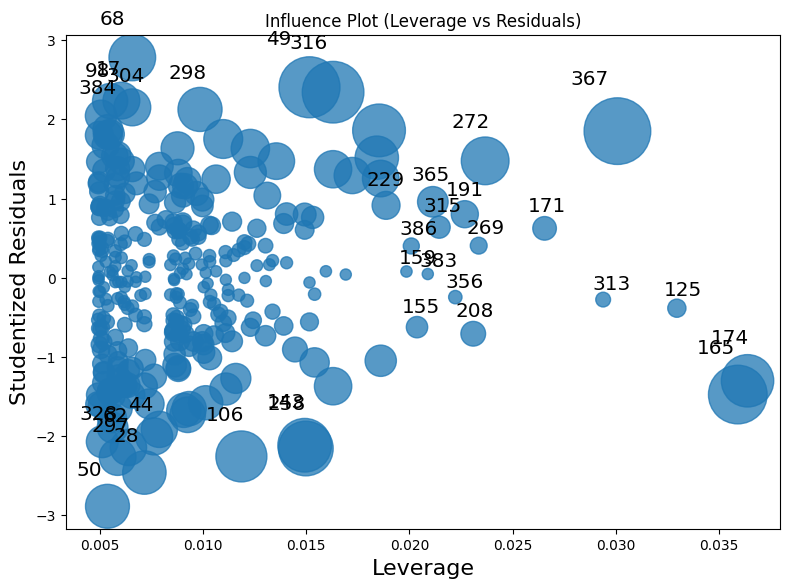

High leverage points: [ 33  56  63  68  81 110 175 180 187 207 215 245 247 270 278 283 294 297]
Outliers (standardized residuals): [ 34  42  52  78  94  98 138 183 192 193 208 224 258 274 282 316]


In [12]:
import matplotlib.pyplot as plt

# Influence summary
influence = reduced_model.get_influence()

# Get standardized residuals and leverage values
standardized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag

# Cook's distance (optional but useful)
cooks_d, _ = influence.cooks_distance

# Plot leverage vs standardized residuals
fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.influence_plot(reduced_model, ax=ax, criterion="cooks")
plt.title("Influence Plot (Leverage vs Residuals)")
plt.tight_layout()
plt.show()

# Optional: identify potential high leverage / outliers
high_leverage_threshold = 2 * (X_train_red.shape[1]) / X_train_red.shape[0]
outlier_threshold = 2  # standardized residuals above 2 or below -2

high_leverage_points = np.where(leverage > high_leverage_threshold)[0]
outliers = np.where(np.abs(standardized_residuals) > outlier_threshold)[0]

print("High leverage points:", high_leverage_points)
print("Outliers (standardized residuals):", outliers)

### Parts I and J

In [9]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df[['Price', 'US']]  # Use only significant predictors
X = pd.get_dummies(X, drop_first=True)  # Convert 'US' to binary
y = df['Sales']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define alphas for tuning
alphas = np.logspace(-3, 3, 100)

# Pipeline: Standardize then RidgeCV
ridge_cv = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, store_cv_values=True))
ridge_cv.fit(X_train, y_train)

# Best alpha and evaluation
best_alpha = ridge_cv.named_steps['ridgecv'].alpha_
y_pred = ridge_cv.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

# Coefficients
ridge_coef = ridge_cv.named_steps['ridgecv'].coef_
intercept = ridge_cv.named_steps['ridgecv'].intercept_

# Print results
print(f"Best alpha: {best_alpha}")
print(f"Ridge RMSE: {rmse_ridge:.2f}")
print(f"Ridge R²: {r2_ridge:.2f}")
print("Coefficients:", ridge_coef)
print("Intercept:", intercept)

Best alpha: 4.9770235643321135
Ridge RMSE: 7.77
Ridge R²: 0.21
Coefficients: [-1.22715219  0.51716692]
Intercept: 7.388187499999999


/Users/abheygupta/Documents/isl/.venv/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


### Part L

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     80.51
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.56e-17
Time:                        12:01:22   Log-Likelihood:                -738.45
No. Observations:                 320   AIC:                             1481.
Df Residuals:                     318   BIC:                             1488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4202      0.686     19.564      0.0

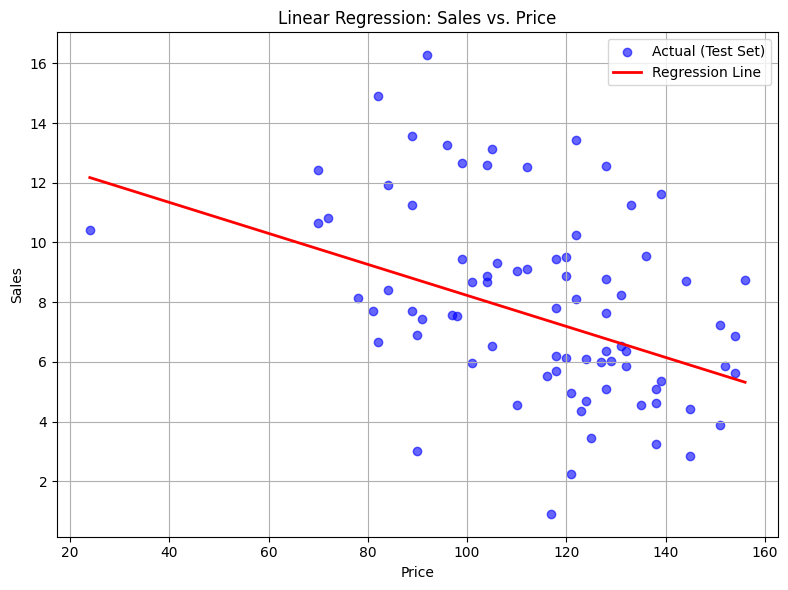

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is already loaded and clean
X = df[['Price']]
y = df['Sales']

# Add constant for intercept
X = sm.add_constant(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on training data
model = sm.OLS(y_train, X_train).fit()

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model summary
print(model.summary())
print("\nSimple Linear Regression RMSE:", round(rmse, 2))
print("Simple Linear Regression R^2 Score:", round(r2, 2))

# --- Plotting ---
plt.figure(figsize=(8, 6))

# Scatter plot of test data
plt.scatter(X_test['Price'], y_test, color='blue', label='Actual (Test Set)', alpha=0.6)

# Regression line
sorted_idx = X_test['Price'].argsort()
plt.plot(X_test['Price'].iloc[sorted_idx], y_pred.iloc[sorted_idx], color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Sales vs. Price')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()